In [1]:
import numpy as np

np.random.seed(42)

In [2]:
limits = [
    (65, 398),
    (505, 555),
    (560, 650),
    (653, 730),
    (739, 815),
    (1090, 1345)
]

limits = np.array(limits)
protein_limits = np.sort(np.concatenate((np.array([0]),np.random.randint(0, 1390, 19),np.array([1390]))))
markers = np.concatenate((np.random.randint(0, 1390, 150), np.array([130]*30)))
print(protein_limits)

[   0   87  121  130  330  343  385  466  769  805  860  871 1044 1095
 1123 1126 1130 1238 1294 1332 1390]


In [3]:
import hpotk
import os
from genophenocorr.preprocessing import load_phenopacket_folder
from genophenocorr.preprocessing import configure_caching_patient_creator
from hpotk.validate import ValidationRunner
from hpotk.validate import ObsoleteTermIdsValidator, PhenotypicAbnormalityValidator, AnnotationPropagationValidator

fpath_hpo = 'https://github.com/obophenotype/human-phenotype-ontology/releases/download/v2023-10-09/hp.json'
hpo = hpotk.load_minimal_ontology(fpath_hpo)

validation_runner = ValidationRunner(
    validators=(
        ObsoleteTermIdsValidator(hpo),
        PhenotypicAbnormalityValidator(hpo),
        AnnotationPropagationValidator(hpo)
    ))

pc = configure_caching_patient_creator(hpo, validation_runner=validation_runner)

fpath_suox_cohort = os.path.join(os.getcwd(), os.pardir, 'notebooks', 'SUOX', 'phenopackets')
cohort = load_phenopacket_folder(fpath_suox_cohort, pc)
f'Loaded {len(cohort)} samples'

Patients Created: 100%|██████████| 35/35 [00:00<00:00, 155.86it/s]


'Loaded 35 samples'

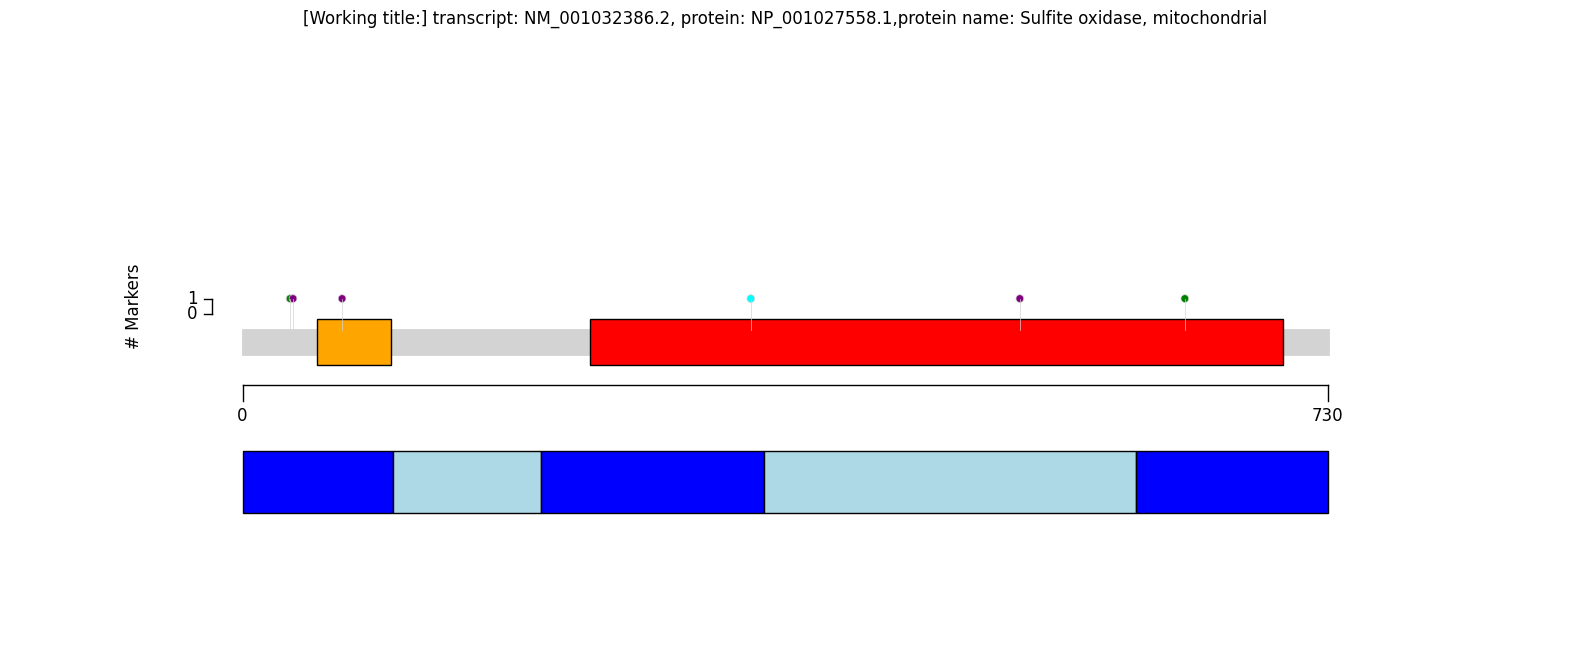

In [4]:
from genophenocorr.view._draw_variants import VariantsVisualizer
tx_id = 'NM_001032386.2'
protein_id = 'NP_001027558.1'
viz = VariantsVisualizer(tx_id, protein_id, cohort)
viz.draw_fig()